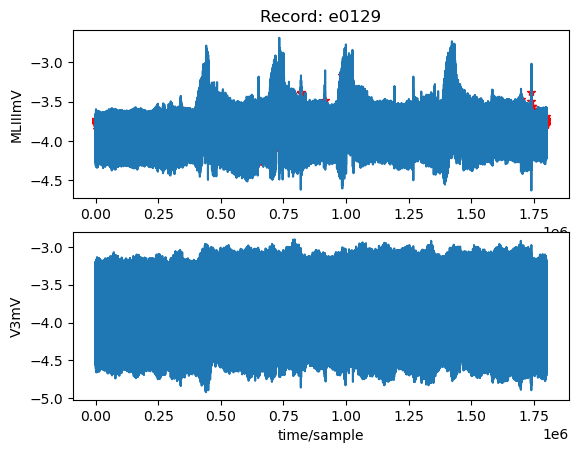

In [20]:
import wfdb
patient_id=0
segment_id=0
data_path = 'C:/Users/andre/1JUPYTER/IC/ecg_data/2_European STT/data'
filename = f'{data_path}/e0129'
rec = wfdb.rdrecord(filename)
ann = wfdb.rdann(filename, "atr")
wfdb.plot_wfdb(rec, ann)

In [21]:
import wfdb

data_path = 'C:/Users/andre/1JUPYTER/IC/ecg_data/2_European STT/data'
filename = f'{data_path}/e0206'
rec = wfdb.rdrecord(filename)
ann = wfdb.rdann(filename, "atr")
# wfdb.plot_wfdb(rec, ann, plot_sym=True, figsize=(15,4))

from collections import Counter
counts = Counter(ann.symbol)

# Print unique values and their counts
for value, count in counts.items():
    print(f"{value}: {count}")


+: 1
N: 10741
V: 164
s: 18
T: 15
~: 64
S: 11


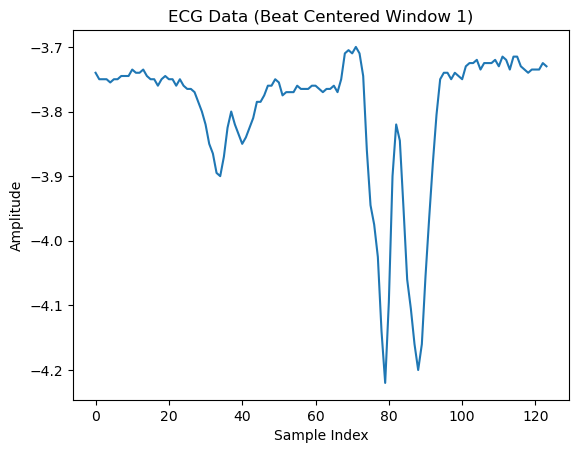

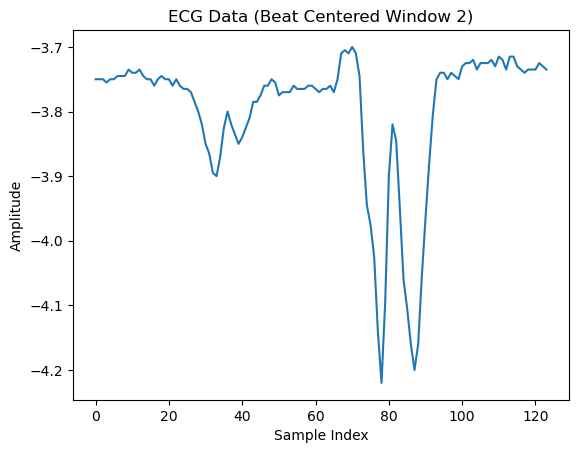

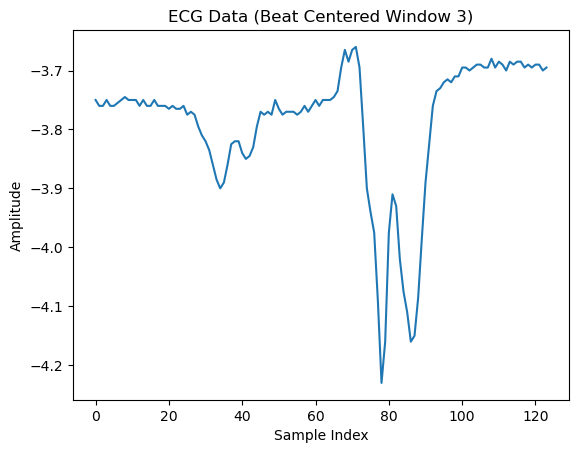

In [22]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Load the record and annotation
data_path = 'C:/Users/andre/1JUPYTER/IC/ecg_data/2_European STT/data'
filename = f'{data_path}/e0129'
rec = wfdb.rdrecord(filename)
ann = wfdb.rdann(filename, "atr")

# Extract sampling frequency (Fs) from the header file
Fs = rec.fs

# Calculate window size as 0.4 seconds
window_duration = 0.5  # in seconds
window_size = int(window_duration * Fs)

# Define a function to plot ECG data using a sliding window with centered beats
def plot_ecg_with_window(ecg_signal, annotations, window_size, num_beats_to_plot=1):
    half_window_size = window_size // 2
    
    for i in range(num_beats_to_plot):
        beat_index = annotations.sample[i]
        start_idx = beat_index - half_window_size
        end_idx = beat_index + half_window_size
        
        window_data = ecg_signal[start_idx:end_idx]
        
        plt.figure()
        plt.plot(window_data)
        plt.title(f"ECG Data (Beat Centered Window {i+1})")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude")
        plt.show()

ecg_data = rec.p_signal[:, 0]
plot_ecg_with_window(ecg_data, ann, window_size, num_beats_to_plot=3)

# Criando segmentos

In [23]:
import os
import numpy as np
import wfdb

window_duration_seconds = 0.5  # Window duration in seconds

record_path = 'C:\\Users\\andre\\1JUPYTER\\IC\\ecg_data\\2_European STT\\data'
# Load the ECG record
for i in range(103, 1035):
    record_num = f'e{i:04d}'
    annotation_path = f"{record_path}\\{record_num}"

    try:
        # Load annotations
        annotation = wfdb.rdann(annotation_path, extension='atr')
        ann_sample = annotation.sample
        ann_symbol = annotation.symbol

        # Load ECG signal
        record = wfdb.rdrecord(annotation_path)
        fs = record.fs  # Sampling frequency
        ecg_signal = record.p_signal[:, 0]

        # Calculate window size based on window duration and sampling frequency
        window_size = int(window_duration_seconds * fs)

        # Iterate over each heartbeat and segment it
        for j, (peak, beat_type) in enumerate(zip(ann_sample[2:-1], ann_symbol[2:-1])):
            if beat_type in ["|","\""]: # Ignore | and " beat_type
                continue
            
            # Centralize the segment around the peak
            start = peak - window_size // 2
            end = peak + window_size // 2
            
            # Ensure the segment boundaries are within the signal range
            start = max(0, start)
            end = min(len(ecg_signal), end)
            
            segment = ecg_signal[start:end]

            # Check if the segment directory exists
            segment_dir = os.path.join(record_path, 'segmented_data', beat_type, record_num)
            if not os.path.exists(segment_dir):
                os.makedirs(segment_dir)

            # Check if the segment file already exists
            file_name = f"{record_num}_segment_{j:05d}_{beat_type}.csv"
            file_path = os.path.join(segment_dir, file_name)
            if not os.path.exists(file_path):
                # Save the segment as a new file in the segmented folder
                np.savetxt(file_path, segment, delimiter=",")
                print(f"Segment {j} ({beat_type}) as {file_name}")
            else:
                print(f"SKIPPING - Segment {j} ({beat_type}) as it already exists.")
    except FileNotFoundError:
        print(f"FileNotFoundError: {annotation_path} not found. Skipping...")


SKIPPING - Segment 0 (N) as it already exists.
SKIPPING - Segment 1 (N) as it already exists.
SKIPPING - Segment 2 (N) as it already exists.
SKIPPING - Segment 3 (N) as it already exists.
SKIPPING - Segment 4 (N) as it already exists.
SKIPPING - Segment 5 (N) as it already exists.
SKIPPING - Segment 6 (N) as it already exists.
SKIPPING - Segment 7 (N) as it already exists.
SKIPPING - Segment 8 (N) as it already exists.
SKIPPING - Segment 9 (N) as it already exists.
SKIPPING - Segment 10 (N) as it already exists.
SKIPPING - Segment 11 (N) as it already exists.
SKIPPING - Segment 12 (N) as it already exists.
SKIPPING - Segment 13 (N) as it already exists.
SKIPPING - Segment 14 (N) as it already exists.
SKIPPING - Segment 15 (N) as it already exists.
SKIPPING - Segment 16 (N) as it already exists.
SKIPPING - Segment 17 (N) as it already exists.
SKIPPING - Segment 18 (N) as it already exists.
SKIPPING - Segment 19 (N) as it already exists.
SKIPPING - Segment 20 (N) as it already exists.
SK

KeyboardInterrupt: 

# First, Middle and Last Beats

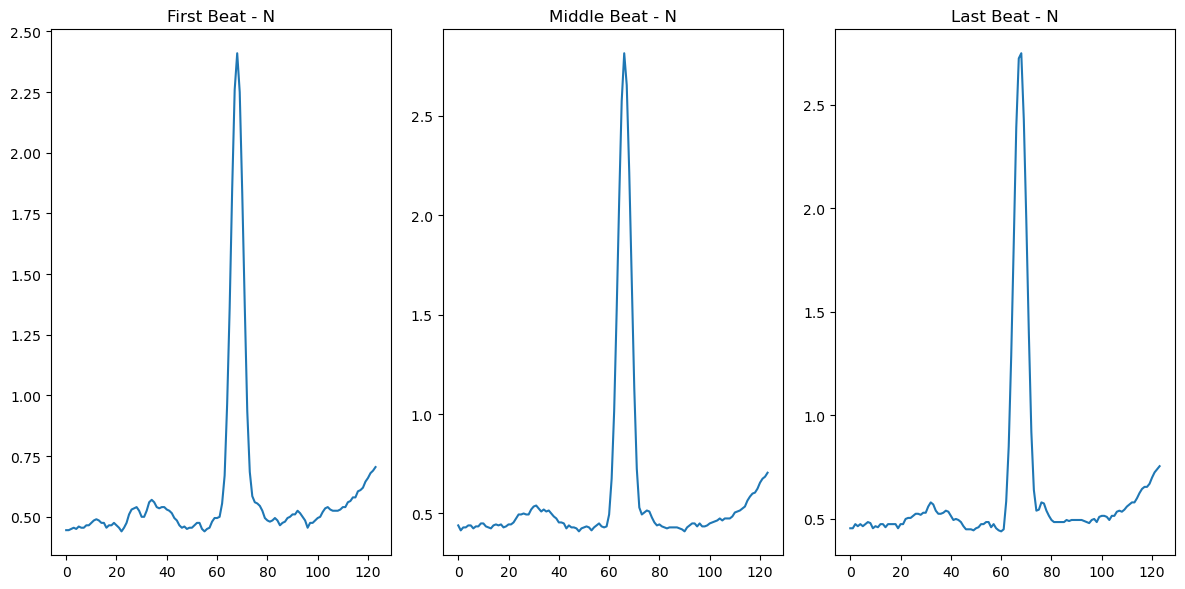

In [ ]:
import os
import matplotlib.pyplot as plt
import wfdb
import numpy as np

record_num = 'e0103'
beat_type = 'N'
segment_dir = f'C:/Users/andre/1JUPYTER/IC/ecg_data/2_European STT/data/segmented_data/{beat_type}/{record_num}'

# List all files in the segment directory for the given beat type
files = sorted(os.listdir(segment_dir))

first_file_path = os.path.join(segment_dir, files[0])
middle_file_path = os.path.join(segment_dir, files[len(files)//2])
last_file_path = os.path.join(segment_dir, files[-1])

# Load ECG signals using wfdb
first_beat_signal = np.loadtxt(first_file_path, delimiter=",")
middle_beat_signal = np.loadtxt(middle_file_path, delimiter=",")
last_beat_signal = np.loadtxt(last_file_path, delimiter=",")

# Plot ECG signals
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(first_beat_signal)
plt.title(f'First Beat - {beat_type}')

plt.subplot(1, 3, 2)
plt.plot(middle_beat_signal)
plt.title(f'Middle Beat - {beat_type}')

plt.subplot(1, 3, 3)
plt.plot(last_beat_signal)
plt.title(f'Last Beat - {beat_type}')

plt.tight_layout()
plt.show()

# Counter

In [ ]:
import os
import numpy as np
import wfdb

window_duration_seconds = 0.5  # Window duration in seconds

record_path = 'C:\\Users\\andre\\1JUPYTER\\IC\\ecg_data\\2_European STT\\data'
beat_type_counters = {}  # Dictionary to store counters for each beat type

# Load the ECG record
for i in range(103, 1035):
    record_num = f'e{i:04d}'
    annotation_path = f"{record_path}\\{record_num}"

    try:
        # Load annotations
        annotation = wfdb.rdann(annotation_path, extension='atr')
        ann_symbol = annotation.symbol

        # Iterate over each heartbeat and count the occurrences of each beat type
        for beat_type in ann_symbol[2:-1]:
            if beat_type in ["|", "\""]:  # Ignore | and " beat_type
                continue

            # Increment counter for beat_type
            beat_type_counters[beat_type] = beat_type_counters.get(beat_type, 0) + 1
    except FileNotFoundError:
        print(f"FileNotFoundError: {annotation_path} not found. Skipping...")

# Print beat type counters
print("\nBeat Type Counters:")
for beat_type, count in beat_type_counters.items():
    print(f"{beat_type}: {count}")


FileNotFoundError: C:\Users\andre\1JUPYTER\IC\ecg_data\2_European STT\data\e0109 not found. Skipping...
FileNotFoundError: C:\Users\andre\1JUPYTER\IC\ecg_data\2_European STT\data\e0117 not found. Skipping...
FileNotFoundError: C:\Users\andre\1JUPYTER\IC\ecg_data\2_European STT\data\e0120 not found. Skipping...
FileNotFoundError: C:\Users\andre\1JUPYTER\IC\ecg_data\2_European STT\data\e0128 not found. Skipping...
FileNotFoundError: C:\Users\andre\1JUPYTER\IC\ecg_data\2_European STT\data\e0130 not found. Skipping...
FileNotFoundError: C:\Users\andre\1JUPYTER\IC\ecg_data\2_European STT\data\e0131 not found. Skipping...
FileNotFoundError: C:\Users\andre\1JUPYTER\IC\ecg_data\2_European STT\data\e0132 not found. Skipping...
FileNotFoundError: C:\Users\andre\1JUPYTER\IC\ecg_data\2_European STT\data\e0134 not found. Skipping...
FileNotFoundError: C:\Users\andre\1JUPYTER\IC\ecg_data\2_European STT\data\e0135 not found. Skipping...
FileNotFoundError: C:\Users\andre\1JUPYTER\IC\ecg_data\2_Europea

# Beat Type Counters TOTAL:
> N: 759556 \
> s: 1076 \
> +: 670 \
> V: 4449 \
> F: 354 \
> ~: 8716 \
> T: 1315 \
> S: 1062 \
> Q: 11 \
> J: 1 \
> n: 5 \
> a: 1 

In [ ]:
import os
import numpy as np
import pandas as pd
import wfdb

window_duration_seconds = 0.5  # Window duration in seconds

record_path = 'C:\\Users\\andre\\1JUPYTER\\IC\\ecg_data\\2_European STT\\data'
beat_types = ['N', '+', 'V', 'F', '~', 'T', 'S', 'Q', 'J', 'n', 'a']

# Create a list to hold dictionaries of annotations for each record
data_list = []

# Load the ECG record
for i in range(103, 1035):
    record_num = f'e{i:04d}'
    annotation_path = os.path.join(record_path, record_num)

    try:
        # Load annotations
        annotation = wfdb.rdann(annotation_path, extension='atr')
        ann_symbol = annotation.symbol

        # Create a dictionary to hold the annotations for this record
        record_annotations = {'pacient': record_num}

        # Count the occurrences of each annotation for this record
        for beat_type in beat_types:
            record_annotations[beat_type] = ann_symbol[2:-1].count(beat_type)

        # Append the record's annotations to the list
        data_list.append(record_annotations)

    except FileNotFoundError:
        print(f"FileNotFoundError: {record_num} not found. Skipping...")

# Convert the list of dictionaries into a DataFrame
data = pd.DataFrame(data_list)
data.to_csv('patient_beats.csv')
data

FileNotFoundError: e0109 not found. Skipping...
FileNotFoundError: e0117 not found. Skipping...
FileNotFoundError: e0120 not found. Skipping...
FileNotFoundError: e0128 not found. Skipping...
FileNotFoundError: e0130 not found. Skipping...
FileNotFoundError: e0131 not found. Skipping...
FileNotFoundError: e0132 not found. Skipping...
FileNotFoundError: e0134 not found. Skipping...
FileNotFoundError: e0135 not found. Skipping...
FileNotFoundError: e0137 not found. Skipping...
FileNotFoundError: e0138 not found. Skipping...
FileNotFoundError: e0140 not found. Skipping...
FileNotFoundError: e0141 not found. Skipping...
FileNotFoundError: e0142 not found. Skipping...
FileNotFoundError: e0143 not found. Skipping...
FileNotFoundError: e0144 not found. Skipping...
FileNotFoundError: e0145 not found. Skipping...
FileNotFoundError: e0146 not found. Skipping...
FileNotFoundError: e0149 not found. Skipping...
FileNotFoundError: e0150 not found. Skipping...
FileNotFoundError: e0152 not found. Skip

,pacient,N,+,V,F,~,T,S,Q,J,n,a
0,e0103,7210,16,82,2,8,0,0,0,0,0,0
1,e0104,7668,0,10,0,71,33,16,0,0,0,0
2,e0105,6625,0,0,0,20,21,2,0,0,0,0
3,e0106,7145,0,0,0,19,21,5,0,0,0,0
4,e0107,7013,0,8,0,161,37,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,e0704,9716,0,0,0,93,18,0,0,0,0,0
83,e0801,9383,0,2,0,278,9,1,0,0,0,0
84,e0808,11073,0,0,0,244,15,0,0,0,0,0
85,e0817,7552,0,0,0,314,3,0,0,0,0,0


In [ ]:
import os
import numpy as np
import pandas as pd
import wfdb

window_duration_seconds = 0.5  # Window duration in seconds

record_path = 'C:\\Users\\andre\\1JUPYTER\\IC\\ecg_data\\2_European STT\\data'
beat_types = ['N', '+', 'V', 'F', '~', 'T', 'S', 'Q', 'J', 'n', 'a']

# Create a list to hold dictionaries of annotations for each record
data_list = []

# Load the ECG record
for i in range(103, 1035):
    record_num = f'e{i:04d}'
    annotation_path = os.path.join(record_path, record_num)

    try:
        # Load annotations
        annotation = wfdb.rdann(annotation_path, extension='atr')
        ann_symbol = annotation.symbol

        # Create a dictionary to hold the annotations for this record
        record_annotations = {'pacient': record_num}

        # Count the occurrences of each annotation for this record
        for beat_type in beat_types:
            if beat_type in ann_symbol[2:-1]:
                record_annotations[beat_type] = 1
            else:
                record_annotations[beat_type] = 0

        # Append the record's annotations to the list
        data_list.append(record_annotations)

    except FileNotFoundError:
        print(f"FileNotFoundError: {record_num} not found. Skipping...")

# Convert the list of dictionaries into a DataFrame
data = pd.DataFrame(data_list)
data.to_csv('patient_binary_beats.csv')
data


FileNotFoundError: e0109 not found. Skipping...
FileNotFoundError: e0117 not found. Skipping...
FileNotFoundError: e0120 not found. Skipping...
FileNotFoundError: e0128 not found. Skipping...
FileNotFoundError: e0130 not found. Skipping...
FileNotFoundError: e0131 not found. Skipping...
FileNotFoundError: e0132 not found. Skipping...
FileNotFoundError: e0134 not found. Skipping...
FileNotFoundError: e0135 not found. Skipping...
FileNotFoundError: e0137 not found. Skipping...
FileNotFoundError: e0138 not found. Skipping...
FileNotFoundError: e0140 not found. Skipping...
FileNotFoundError: e0141 not found. Skipping...
FileNotFoundError: e0142 not found. Skipping...
FileNotFoundError: e0143 not found. Skipping...
FileNotFoundError: e0144 not found. Skipping...
FileNotFoundError: e0145 not found. Skipping...
FileNotFoundError: e0146 not found. Skipping...
FileNotFoundError: e0149 not found. Skipping...
FileNotFoundError: e0150 not found. Skipping...
FileNotFoundError: e0152 not found. Skip

,pacient,N,+,V,F,~,T,S,Q,J,n,a
0,e0103,1,1,1,1,1,0,0,0,0,0,0
1,e0104,1,0,1,0,1,1,1,0,0,0,0
2,e0105,1,0,0,0,1,1,1,0,0,0,0
3,e0106,1,0,0,0,1,1,1,0,0,0,0
4,e0107,1,0,1,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,e0704,1,0,0,0,1,1,0,0,0,0,0
83,e0801,1,0,1,0,1,1,1,0,0,0,0
84,e0808,1,0,0,0,1,1,0,0,0,0,0
85,e0817,1,0,0,0,1,1,0,0,0,0,0


# Creating TS file with 4449 V beeats and 4449 N beats

## Path Adjustment

In [27]:
from sklearn.model_selection import train_test_split
import pandas as pd
pd.read_csv('patient_binary_beats.csv')
data = data[['pacient', 'V']]
X_train, X_test, y_train, y_test = train_test_split(data, data['V'], test_size=0.2, stratify=data['V'], random_state=42)
print('train:', len(y_train))
print('test:', len(y_test))
print(X_test.head(2))

# Function to construct the path based on beats V value
def construct_path(row):
    pacient_id = row['pacient']
    beats_V = row['V']
    if beats_V == 1:
        return f"C:\\Users\\andre\\1JUPYTER\\IC\\ecg_data\\2_European STT\\data\\segmented_data\\V\\{pacient_id}"
    else:
        return f"C:\\Users\\andre\\1JUPYTER\\IC\\ecg_data\\2_European STT\\data\\segmented_data\\N\\{pacient_id}"

# Apply the function to each row of the dataframe
X_test['path'] = X_test.apply(construct_path, axis=1)
X_train['path'] = X_train.apply(construct_path, axis=1)

# Display the updated dataframe
X_test

train: 69
test: 18
   pacient  V
72   e0605  1
32   e0161  0


,pacient,V,path
72,e0605,1,C:\Users\andre\1JUPYTER\IC\ecg_data\2_European...
32,e0161,0,C:\Users\andre\1JUPYTER\IC\ecg_data\2_European...
85,e0817,0,C:\Users\andre\1JUPYTER\IC\ecg_data\2_European...
83,e0801,1,C:\Users\andre\1JUPYTER\IC\ecg_data\2_European...
5,e0108,1,C:\Users\andre\1JUPYTER\IC\ecg_data\2_European...
50,e0304,1,C:\Users\andre\1JUPYTER\IC\ecg_data\2_European...
22,e0129,0,C:\Users\andre\1JUPYTER\IC\ecg_data\2_European...
37,e0202,1,C:\Users\andre\1JUPYTER\IC\ecg_data\2_European...
16,e0122,1,C:\Users\andre\1JUPYTER\IC\ecg_data\2_European...
39,e0204,0,C:\Users\andre\1JUPYTER\IC\ecg_data\2_European...


## Creating TS file

In [28]:
import os
import random
import numpy as np

record_path = 'C:\\Users\\andre\\1JUPYTER\\IC\\ecg_data\\2_European STT\\data\\ts_files'
ts_train_path = 'C:\\Users\\andre\\1JUPYTER\\IC\\ecg_data\\2_European STT\\ts_files\\train.ts'
ts_test_path = 'C:\\Users\\andre\\1JUPYTER\\IC\\ecg_data\\2_European STT\\ts_files\\test.ts'

os.makedirs(os.path.dirname(ts_train_path), exist_ok=True)
os.makedirs(os.path.dirname(ts_test_path), exist_ok=True)

# Function to read content from CSV file
def read_csv_content(file_path):
    return np.loadtxt(file_path, delimiter=",")

# Open the .TS file in write mode
def create_ts_file(ts_file_path, df):
    count_N = 0
    count_V = 0
    segments_N = []
    segments_V = []

    with open(ts_file_path, 'w') as ts_file:
        for index, row in df.iterrows():
            pacient = row['pacient']
            beat = row['V']
            path = row['path']

            # Iterate over all records
            for root, dirs, files in os.walk(path):
                for file in files:
                    if file.endswith(".csv"):
                        file_path = os.path.join(root, file)
                        # Extract label from the filename
                        label = file.split('_')[-1][0]

                        # Update the appropriate list with the segment content and label
                        if (label == 'V' and beat == 1) or (label == 'N' and beat == 0):
                            if label == 'V':
                                segments_V.append((read_csv_content(file_path), label))
                                count_V += 1
                            elif label == 'N':
                                segments_N.append((read_csv_content(file_path), label))
                                count_N += 1
                        else:
                            continue

        # Write the 'V' segments to the .TS file
        for segment_content, label in segments_V:
            ts_file.write(','.join(map(str, segment_content)) + f"\t{label}\n")

        # Shuffle 'N' segments and select the first 4449 segments
        random.shuffle(segments_N)
        segments_N = segments_N[:count_V]

        # Write the selected 'N' segments to the .TS file
        for segment_content, label in segments_N:
            ts_file.write(','.join(map(str, segment_content)) + f"\t{label}\n")

    print("TS file created successfully.")
    print(f"Number of 'N' labels: {count_N}")
    print(f"Number of 'V' labels: {count_V}\n")

create_ts_file(ts_test_path, X_test)
create_ts_file(ts_train_path, X_train)

TS file created successfully.
Number of 'N' labels: 65243
Number of 'V' labels: 1009

TS file created successfully.
Number of 'N' labels: 273472
Number of 'V' labels: 3440

